
<a href="https://www.zero-grad.com/">
         <img alt="Zero Grad" src="https://i.postimg.cc/J4xdQKmg/dl-banner.png" >
      </a>

Bikes Sharing
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Quick Exploration of the Dataset

In [ ]:
import pandas as pd

dy_df = pd.read_csv('/content/drive/MyDrive/Grokking Machine Learning/04- Python Deep Learning/W19/DL Project 1_Bike Sharing/Bike-Sharing-Dataset/day.csv')
dy_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hr_df = pd.read_csv('/content/drive/MyDrive/Grokking Machine Learning/04- Python Deep Learning/W19/DL Project 1_Bike Sharing/Bike-Sharing-Dataset/hour.csv')
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
dy_df.shape, hr_df.shape

((731, 16), (17379, 17))

In [ ]:
# Check duplicates
print("No. of duplicates in day.csv: ", dy_df.duplicated().sum())
print("No. of duplicates in hour.csv: ", hr_df.duplicated().sum())

# Check missing values
print("No. of missing values in day.csv: ", dy_df.isnull().sum().sum())
print("No. of missing values in hour.csv: ", hr_df.isnull().sum().sum())

No. of duplicates in day.csv:  0
No. of duplicates in hour.csv:  0
No. of missing values in day.csv:  0
No. of missing values in hour.csv:  0


In [ ]:
dy_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Convert to datetime
dy_df['dteday'] = pd.to_datetime(dy_df['dteday'])
hr_df['dteday'] = pd.to_datetime(hr_df['dteday'])

In [ ]:
# Drop unnecessary columns
dy_df.drop(['instant'], axis=1, inplace=True)
hr_df.drop(['instant', 'dteday'], axis=1, inplace=True)

In [ ]:
# Check Count vs. datetime
import plotly.express as px

fig = px.line(dy_df, x='dteday', y='cnt', title='Count vs. datetime (day.csv)')
fig.show()


In [ ]:
# Registerd and Casual vs. datetime (day.csv)
fig = px.line(dy_df, x='dteday', y=['registered', 'casual'], title='Registered and Casual vs. datetime (day.csv)')
fig.show()

In [ ]:
# Count vs. Hours (hour.csv)
hours = hr_df.groupby('hr').sum().reset_index()
fig = px.line(hours, x='hr', y='cnt', title='Count vs. datetime (hour.csv)')
fig.show()

In [ ]:
# Registerd and Casual vs. Hours (hour.csv)
fig = px.line(hours, x='hr', y=['registered', 'casual'], title='Registered and Casual vs. datetime (hour.csv)')
fig.show()

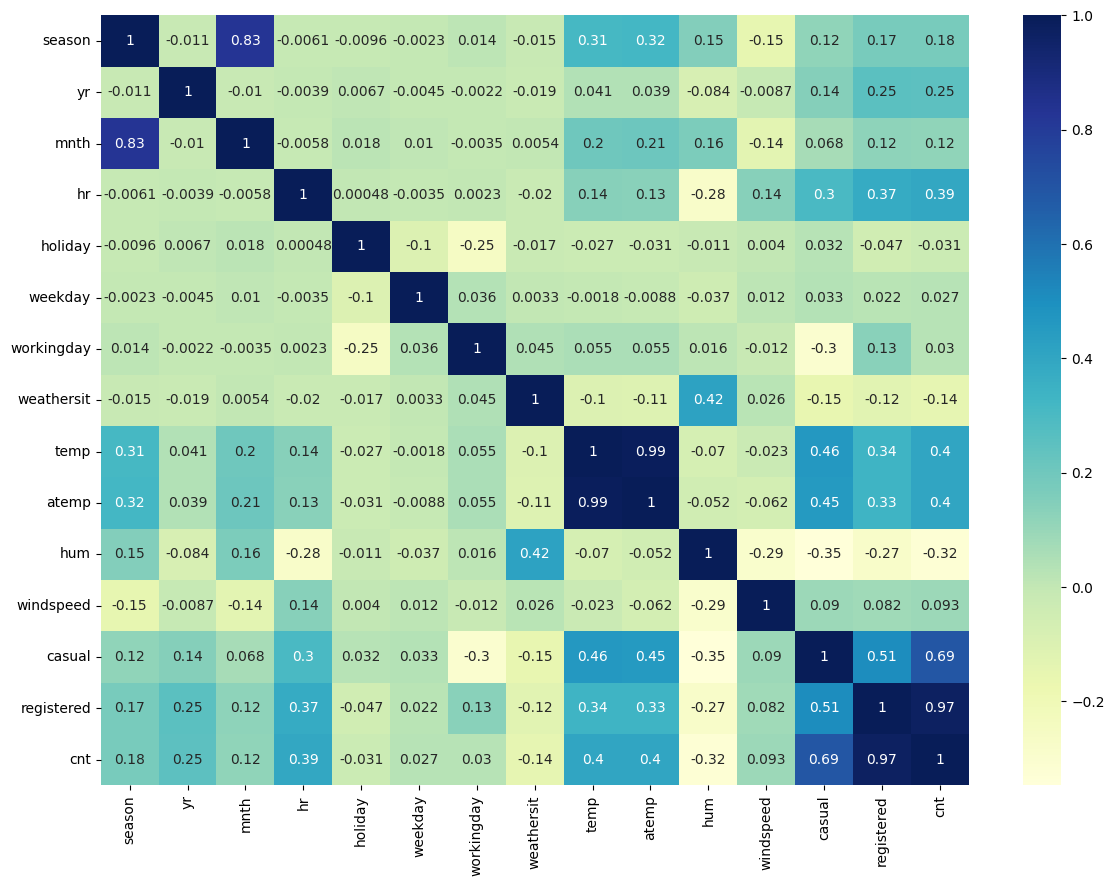

In [ ]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt

corr = hr_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

<Axes: >

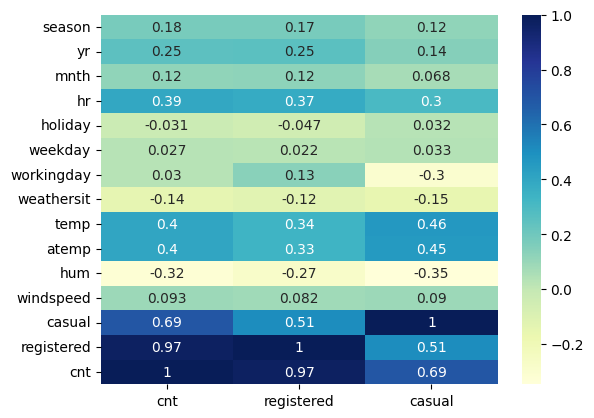

In [ ]:
c = hr_df.corr()[['cnt', 'registered', 'casual']]
sns.heatmap(c, annot=True, cmap='YlGnBu')

```
You can explore more about this dataset and find useful insights
But for now, let's start with the following steps (Suggested steps):
1- Play with hr_df only
2- Drop 'cnt' column from the dataset and  our target is to predict two outputs 'casual' and 'registered' columns
3- Drop 'atemp' and keep 'temp' because they are highly correlated
4- Apply quick classic ml models
5- Apply Deep Learning model
```

# Data Preprocessing

In [ ]:
# Take copy
df = hr_df.copy()

# Drop 'cnt', 'temp'
df.drop(['cnt', 'atemp'], axis=1, inplace=True)

# check data
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1


In [ ]:
# Numerical columns
num_cols = ['temp', 'hum', 'windspeed'] # All are normalized

# Categorical columns
cat_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'] # To be one-hot encoded


In [ ]:
# Split into train and test
from sklearn.model_selection import train_test_split

X = df.drop(['casual', 'registered'], axis=1)
y = df[['casual', 'registered']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)    # Shuffle=False to keep the order of datetime

In [ ]:
X.sample()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
4332,3,0,7,10,1,1,0,2,0.76,0.55,0.0896


In [ ]:
y.sample()

,casual,registered
6465,8,57


In [ ]:
# One hot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(sparse_output=True)
transformer = ColumnTransformer([('one_hot_encoder', ohe, cat_cols)], remainder='passthrough')

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

# Apply quick classic ml models

In [ ]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Train score: ", lr.score(X_train, y_train))
print("Test score: ", lr.score(X_test, y_test))

Train score:  0.6359018898881695
Test score:  0.601486074053618


In [ ]:
# Apply Descision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

print("Train score: ", dt.score(X_train, y_train))
print("Test score: ", dt.score(X_test, y_test))

Train score:  0.9999838314069003
Test score:  0.7560336633295448


# Apply Deep Learning model

In [1]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='linear'))

# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','accuracy'])

X_train_arr = X_train.toarray()
X_test_arr = X_test.toarray()


# fit the keras model on the dataset
history = model.fit(X_train_arr, y_train, validation_split=0.2, epochs=10, batch_size=32)


NameError: name 'X_train' is not defined

In [ ]:
# evaluate the keras model
model.evaluate(X_test_arr, y_test)

109/109 [==============================] - 0s 2ms/step - loss: 7384.4097 - mse: 7384.4097


[7384.40966796875, 7384.40966796875]

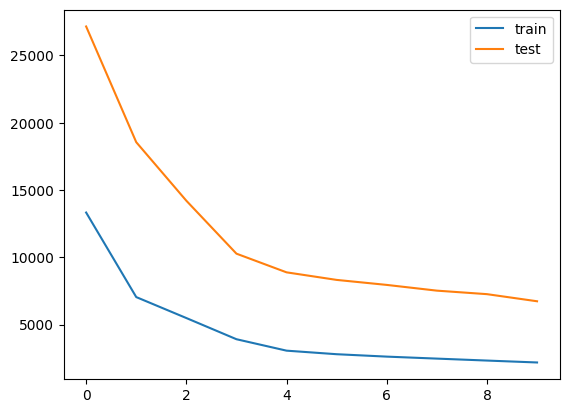

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# R2 score
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_arr)
r2_score(y_test, y_pred)

109/109 [==============================] - 0s 2ms/step


0.537375890372038

# Keras Tuner
https://keras.io/keras_tuner/

In [ ]:
# pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.8 MB/s eta 0:00:00


* Hyperparameter Tuning using Hyperband:

https://arxiv.org/pdf/1603.06560.pdf

In [ ]:
import keras_tuner as kt

def build_model(hp):
    activation = hp.Choice('dense_activation', ['relu', 'sigmoid'])
    initializer = hp.Choice('dense_initializer', ['glorot_uniform', 'normal'])
    optimizer = hp.Choice('optimizer', ['adam', 'sgd'])
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation=activation, kernel_initializer=initializer))
    model.add(Dense(64, activation=activation, kernel_initializer=initializer))
    model.add(Dense(32, activation=activation, kernel_initializer=initializer))
    model.add(Dense(2, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    return model

tuner = kt.Hyperband(build_model, objective='mse', max_epochs=10, factor=3, directory='my_dir', project_name='intro_to_kt')

tuner.search(X_train_arr, y_train, epochs=10, validation_split=0.2)

Trial 8 Complete [00h 00m 04s]
mse: 13816.3505859375

Best mse So Far: 1584.3846435546875
Total elapsed time: 00h 00m 46s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'dense_activation': 'relu',
 'dense_initializer': 'glorot_uniform',
 'optimizer': 'adam',
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [ ]:
model = tuner.hypermodel.build(best_hps)

history = model.fit(X_train_arr, y_train, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
348/348 - 2s - loss: 6242.3320 - mse: 6242.3320 - val_loss: 7517.2544 - val_mse: 7517.2544 - 2s/epoch - 5ms/step
Epoch 2/10
348/348 - 1s - loss: 1586.4436 - mse: 1586.4436 - val_loss: 5420.6680 - val_mse: 5420.6680 - 948ms/epoch - 3ms/step
Epoch 3/10
348/348 - 1s - loss: 889.3575 - mse: 889.3575 - val_loss: 3360.2322 - val_mse: 3360.2322 - 957ms/epoch - 3ms/step
Epoch 4/10
348/348 - 1s - loss: 743.5703 - mse: 743.5703 - val_loss: 3467.9026 - val_mse: 3467.9026 - 918ms/epoch - 3ms/step
Epoch 5/10
348/348 - 1s - loss: 688.4381 - mse: 688.4381 - val_loss: 3196.8291 - val_mse: 3196.8291 - 844ms/epoch - 2ms/step
Epoch 6/10
348/348 - 1s - loss: 661.1821 - mse: 661.1821 - val_loss: 3422.9856 - val_mse: 3422.9856 - 609ms/epoch - 2ms/step
Epoch 7/10
348/348 - 1s - loss: 631.1424 - mse: 631.1424 - val_loss: 3533.3330 - val_mse: 3533.3330 - 653ms/epoch - 2ms/step
Epoch 8/10
348/348 - 1s - loss: 604.7254 - mse: 604.7254 - val_loss: 2980.1270 - val_mse: 2980.1270 - 640ms/epoch - 2ms/step

In [ ]:
model.evaluate(X_test_arr, y_test)

109/109 [==============================] - 0s 1ms/step - loss: 3120.5596 - mse: 3120.5596


[3120.5595703125, 3120.5595703125]

In [ ]:
# calculate predictions accuracy
y_pred = model.predict(X_test_arr)
r2_score(y_test, y_pred)

109/109 [==============================] - 0s 2ms/step


0.8238881332461445